In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import auc

from sklearn.metrics import accuracy_score, classification_report, roc_curve, precision_recall_curve, auc 
from sklearn.metrics import confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
df.shape

(8124, 23)

In [7]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

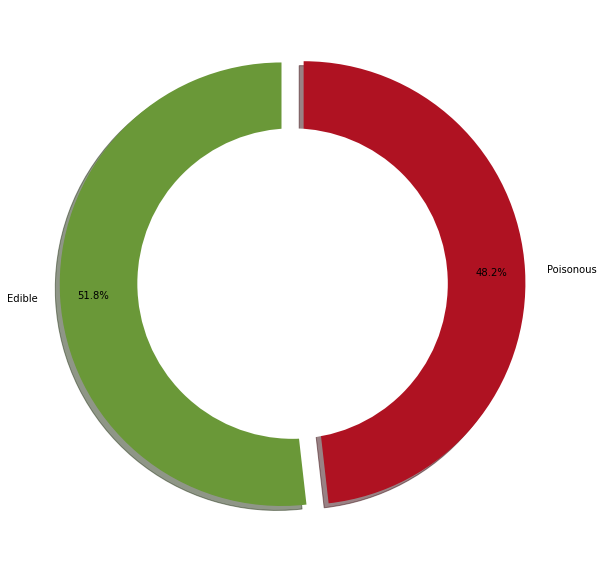

In [9]:
plt.figure(figsize = (10,8))
#explsion
plt.pie(df['class'].value_counts(), colors = ['#6A9838','#af1222'], labels = ['Edible', 'Poisonous'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = (0.05,0.05), shadow = True)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

/Users/yeshwanthnelakurthy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

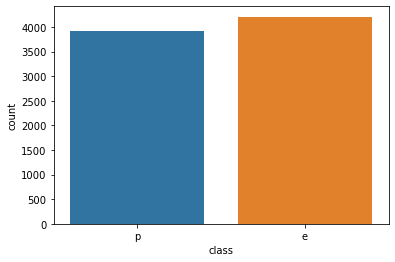

In [10]:
sns.countplot(df['class'])

<Figure size 1008x432 with 0 Axes>

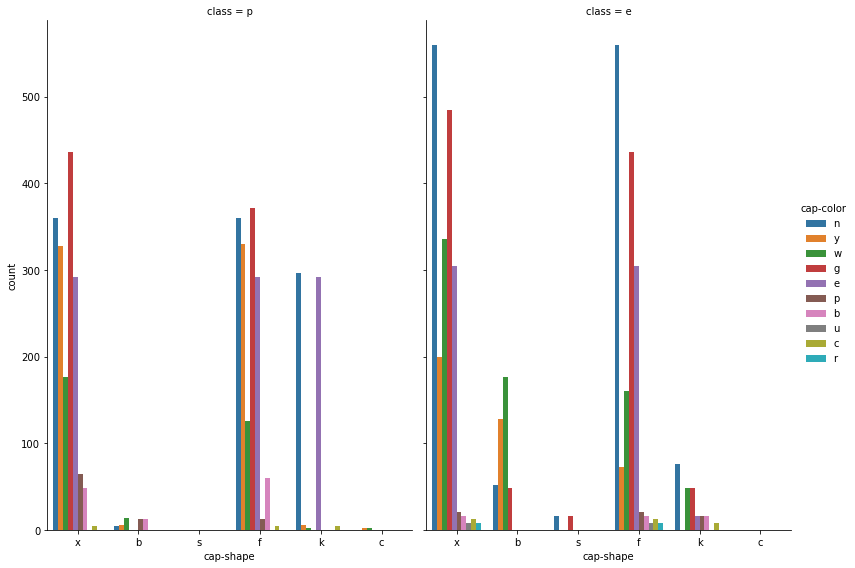

In [11]:
plt.figure(figsize = (14,6))
g = sns.catplot(x="cap-shape", hue="cap-color", col="class",
                data=df, kind="count",
                height=8, aspect=.7);


In [12]:
#plt.figure(figsize = (25,10))
#sns.barplot('cap-shape','class',hue='cap-color',data=df,kind="count")

<Figure size 1008x432 with 0 Axes>

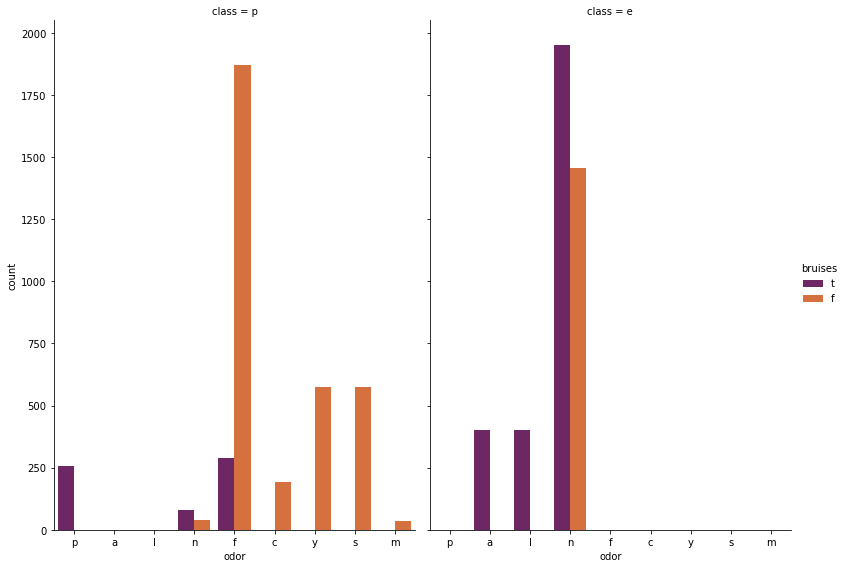

In [13]:
plt.figure(figsize = (14,6))
g = sns.catplot(x="odor", hue="bruises", col="class",
                data=df, kind="count",
                height=8, aspect=.7 , palette = 'inferno');

->  PRE-PROCESSING

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)   
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [15]:
df['veil-type'].unique()

array([0])

<AxesSubplot:>

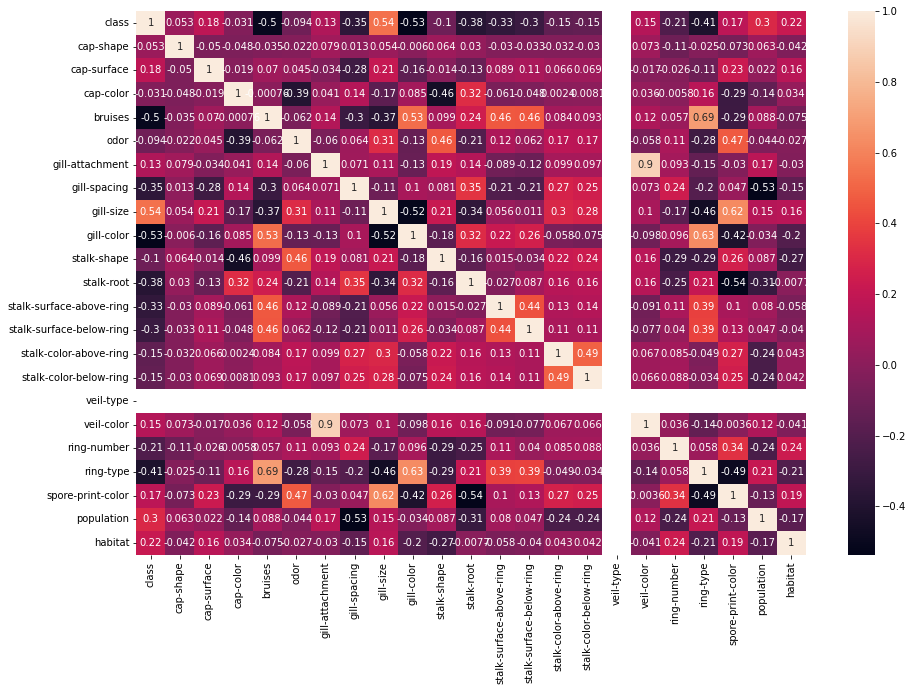

In [16]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot = True) 

In [17]:
df.drop(['veil-type'],axis=1,inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

<AxesSubplot:>

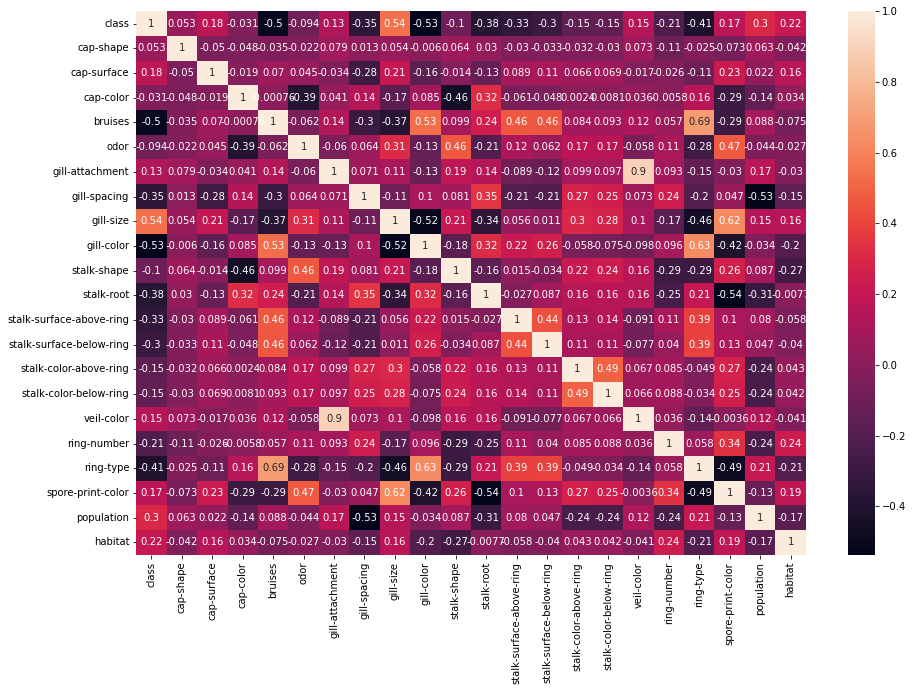

In [19]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot = True) 

In [20]:
x = df.drop(['class'] , axis = 1)
y = df['class']

In [21]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 0)

-> RANDOM FOREST

In [22]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(max_depth = 5)

In [23]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [24]:
model1.fit(x_train , y_train)
model1.score(x_train , y_train)

0.9913832897368826

In [25]:
predictions = model1.predict(x_test)
model1.score(x_test , y_test)
y_pred_prob_RFC = model1.predict_proba(x_test)[:, 1]

In [26]:
accuracy_score(y_test , predictions)

0.9926153846153846

In [27]:
from sklearn.metrics import plot_confusion_matrix

In [31]:
def print_score(model1,x_train,y_train,x_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,model1.predict(x_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,model1.predict(x_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,model1.predict(x_train))))
        res = cross_val_score(model1, x_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,model1.predict(x_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,model1.predict(x_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,model1.predict(x_test))))

In [48]:
print_score(model1, x_train, y_train, x_test, y_test, train=False)

Test results:

Accuracy Score: 0.9926

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       852
           1       1.00      0.98      0.99       773

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625


Confusion Matrix:
[[852   0]
 [ 12 761]]



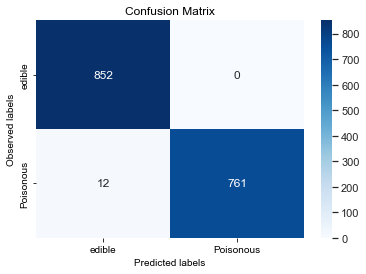

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)

ax = plt.subplot()
sns.set(font_scale=1.0) #edited as suggested
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");  # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Observed labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['edible', 'Poisonous']);
ax.yaxis.set_ticklabels(['edible', 'Poisonous']);
plt.show()

In [46]:
print(classification_report(y_test,predictions),                           
     
      accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       852
           1       1.00      0.98      0.99       773

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625
 0.9926153846153846


In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

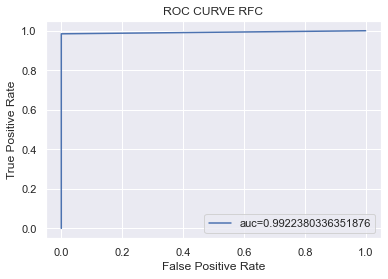

The Score for the ROC Curve is : 99.22%


In [50]:
#roc_curve plot to check the socre of RFC
fpr, tpr, _= roc_curve(y_test, predictions)
auc_score = roc_auc_score(y_test, predictions)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

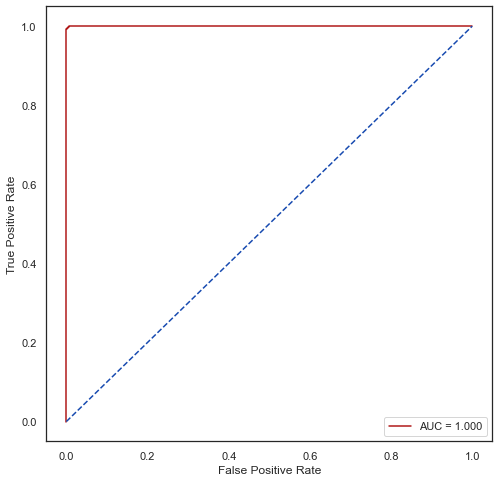

In [51]:
# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob_RFC)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [52]:
from sklearn.decomposition import PCA

In [53]:
pca = PCA(n_components=2)

In [54]:
X_train1 = pca.fit_transform(x_train)
X_test1 = pca.transform(x_test)

In [55]:
rfc = RandomForestClassifier(n_estimators=200)

In [56]:
rfc.fit(X_train1,y_train)

RandomForestClassifier(n_estimators=200)

In [57]:
predrfc = rfc.predict(X_test1)

In [58]:
print(confusion_matrix(y_test,predrfc))

[[823  29]
 [ 32 741]]


In [59]:
print(classification_report(y_test,predrfc))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       852
           1       0.96      0.96      0.96       773

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



In [60]:
accuracy_score(y_test,predrfc)

0.9624615384615385

In [61]:
import numpy as np

Text(0, 0.5, 'PC 2')

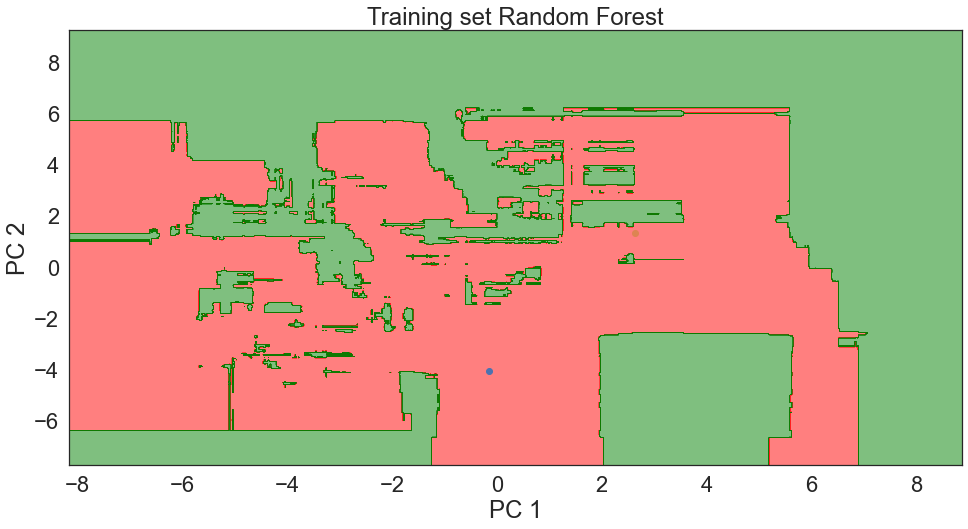

In [62]:
sns.set_context('notebook',font_scale=2)
plt.figure(figsize=(16,8))
from matplotlib.colors import ListedColormap
X_set , y_set = X_train1, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step = 0.01),
                     np.arange(start = X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step = 0.01)     )
plt.contourf(X1,X2,rfc.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.5,cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[j,0],X_set[j,1],cmap=ListedColormap(('red','green'))(i),label=j)
plt.title("Training set Random Forest")
plt.xlabel('PC 1')
plt.ylabel('PC 2')

Text(0, 0.5, 'PC 2')

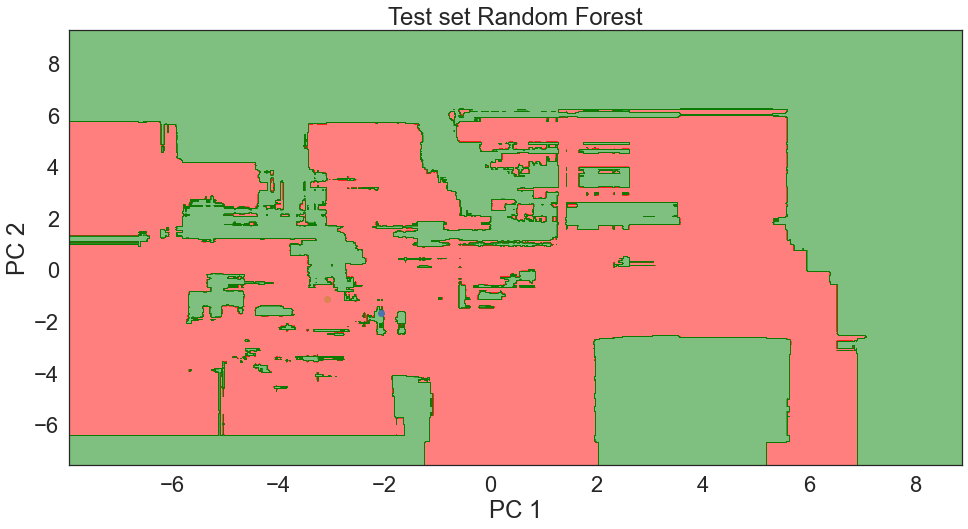

In [63]:
sns.set_context('notebook',font_scale=2)
plt.figure(figsize=(16,8))
from matplotlib.colors import ListedColormap
X_set , y_set = X_test1, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step = 0.01),
                     np.arange(start = X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step = 0.01)     )
plt.contourf(X1,X2,rfc.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.5,cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[j,0],X_set[j,1],cmap=ListedColormap(('red','green'))(i),label=j)
plt.title("Test set Random Forest")
plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)
cmd = ConfusionMatrixDisplay(cm, display_labels=['edible','Poisonous'])
cmd.plot()

In [ ]:
def print_score(model1,x_train,y_train,x_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,model1.predict(x_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,model1.predict(x_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,model1.predict(x_train))))
        res = cross_val_score(model1, x_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,model1.predict(x_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,model1.predict(x_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,model1.predict(x_test))))

In [ ]:
print_score(model1, x_train, y_train, x_test, y_test, train=True)

In [ ]:
print_score(model1, x_train, y_train, x_test, y_test, train=False)